In [54]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
%matplotlib inline

files = ["req1.dat", "seg-loc.dat", "spac-temp.dat", "random.dat", "80-20.dat"]
algs = ["FIFO", "LRU", "Random"]
total_frames = [60, 1000, 700, 80, 400]


def get_out(output):
    fault = int(output.decode().split("\n")[3].strip().split(" ")[-1])
    total = int(output.decode().split("\n")[4].strip().split(" ")[-1])
    return fault, total


pb = tqdm(total=sum(total_frames)*len(algs))

results = []
for fi, file in enumerate(files):
    temp_file = []
    for alg in algs:
        temp_alg = []
        for i in range(1, total_frames[fi]+1):
            pb.update(1)
            output = subprocess.check_output(
                [f"./{alg}", "1000", f"{i}", f"{total_frames[fi]}", f"{file}"])
            fault, total = get_out(output)
            temp_alg.append((fault/total)*100)
        temp_file.append(temp_alg)
    results.append(temp_file)

results = np.array(results)


  0%|          | 0/6720 [00:00<?, ?it/s]

C:\Users\Shashank\AppData\Local\Temp\ipykernel_14204\1395905610.py:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  results = np.array(results)


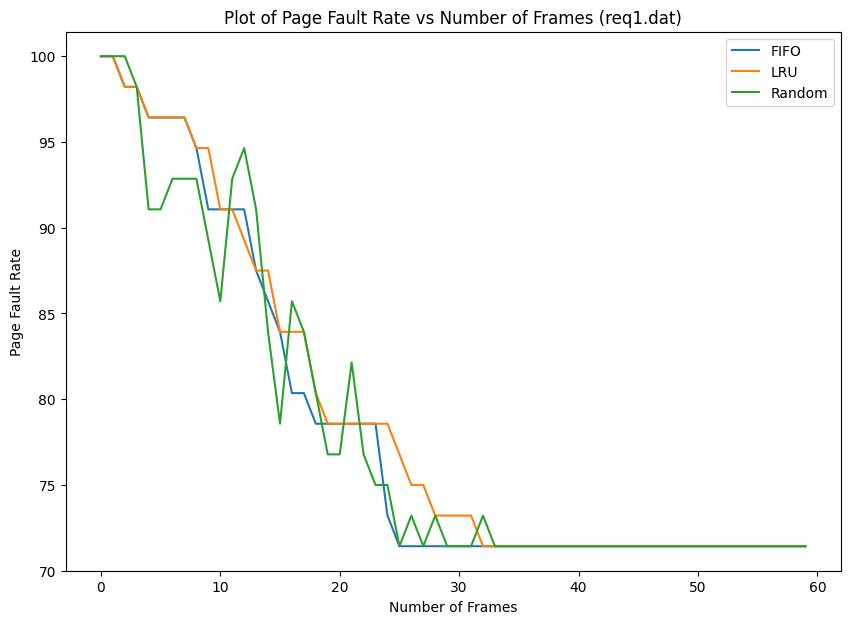

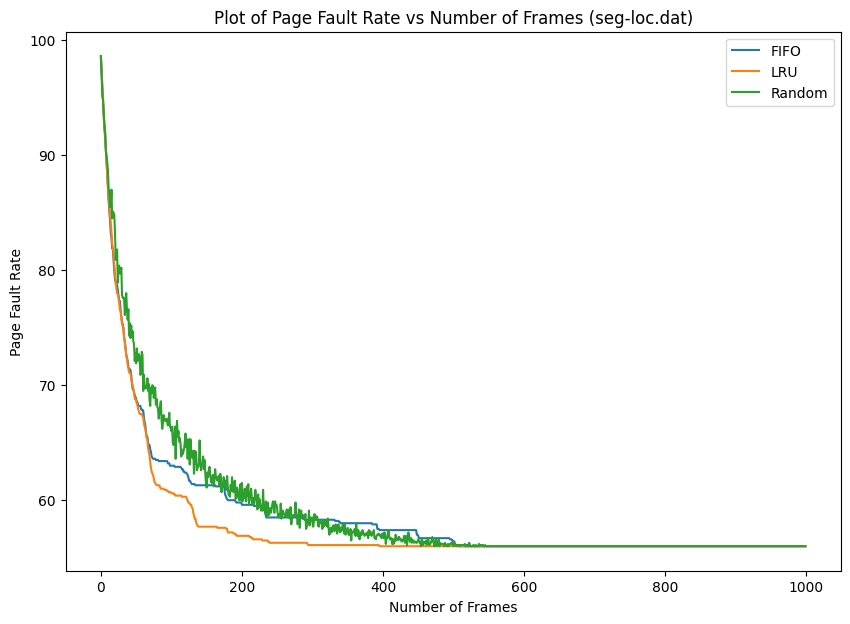

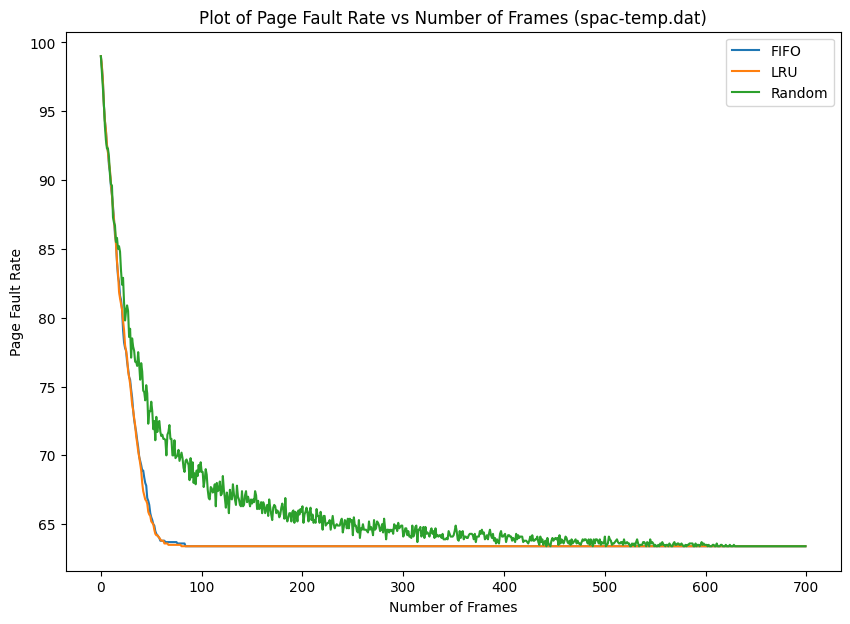

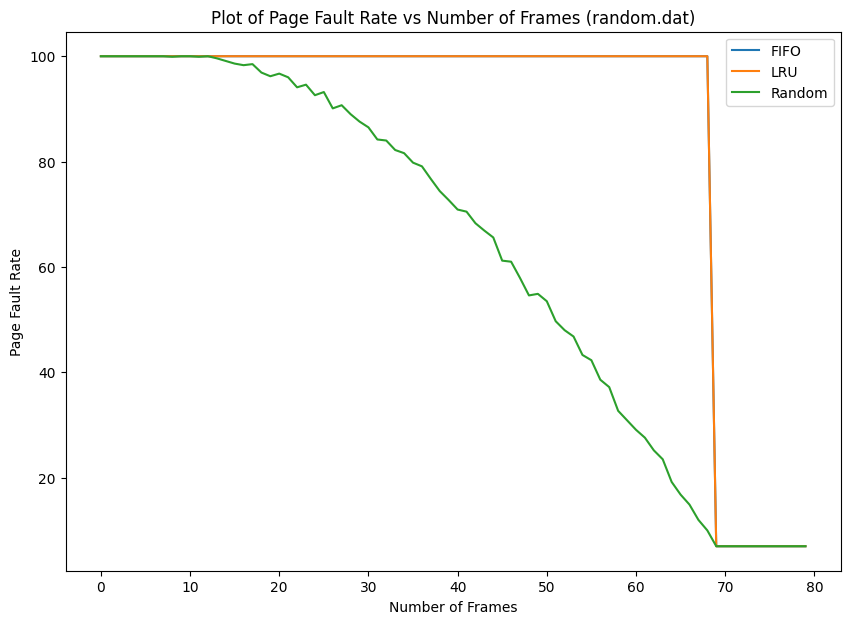

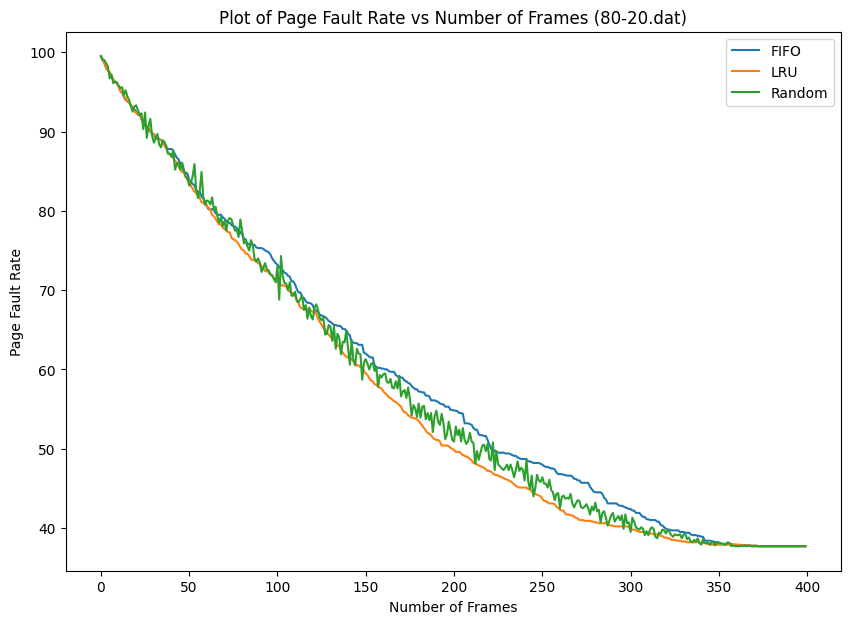

In [55]:
def plot_file(file):
    num = files.index(file)
    plt.figure(figsize=(10, 7))
    plt.title(
        f"Plot of Page Fault Rate vs Number of Frames ({file})")
    plt.xlabel("Number of Frames")
    plt.ylabel("Page Fault Rate")
    for i in range(len(algs)):
        plt.plot(results[num][i], label=algs[i])
    plt.legend()
    plt.savefig(f"{file.split('.')[0]}.png")
    plt.show()

for file in files:
    plot_file(file)

In [47]:
import random

request_list = []

for i in range(1000):
    if random.random() < 0.8:
        request_list.append(random.randint(0, 200))
    else:
        request_list.append(random.randint(200, 1000))
        
        
with open('80-20.dat', 'w+') as f:
    f.write(" ".join([str(i) for i in request_list]))
    f.write('\n')


In [48]:
import random

request_list = []

for i in range(1000):
    request_list.append(i%70 + 1)


with open('random.dat', 'w+') as f:
    f.write(" ".join([str(i) for i in request_list]))
    f.write('\n')


In [49]:
import random

request_list = []

for i in range(1000):
    offset = i//100
    request_list.append(random.randint(100*offset, 100*(offset + 1)))


with open('spac-temp.dat', 'w+') as f:
    f.write(" ".join([str(i) for i in request_list]))
    f.write('\n')


In [50]:
import random

request_list = []

for i in range(1000):
    offset = i//100
    request_list.append(random.randint(100*offset, 100*(offset + 1)))


with open('spac-temp.dat', 'w+') as f:
    f.write(" ".join([str(i) for i in request_list]))
    f.write('\n')


In [51]:
import random

request_list = []

for i in range(1000):
    if i%100 < 20:
        request_list.append(random.randint(570, 600))
    else:
        offset = i//100
        request_list.append(random.randint(100*offset, 100*(offset + 1)))


with open('seg-loc.dat', 'w+') as f:
    f.write(" ".join([str(i) for i in request_list]))
    f.write('\n')
